In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import math
from scipy.stats import f_oneway

def readfile(filename):
    #Get the data from the file
    file = (os.getcwd()+'\\output\\files\\'+str(filename))
    df = pd.read_csv(file, index_col=False)
    #Drop unnecessary columns, get exit and entry frame.
    df = df.drop(['Cell kind', 'Coordinates'],axis=1)
    df['exit'] = df.loc[df['Event'] == 'exit', 'Frame'].astype(float)
    df['entry'] = df.loc[df['Event'] == 'entry', 'Frame'].astype(float)
    df = df.drop(['Event', 'Frame'], axis=1)
    
    #Get run number
    df['Run'] = np.nan
    run = 1
    for i, row in df.iterrows():
        if row[0] == 'ID':
            run += 1
        else:
            df.at[i, 'Run'] = run
    
    #Group runs and remove info of cells which haven't finished (last 20)
    df = df[df['ID'] != 'ID']
    dfs = [x for _, x in df.groupby('Run')]
    for i in range(len(dfs)):
        dfs[i] = dfs[i].groupby(['ID'], as_index=False).first()
    df = pd.concat(dfs)
    df = df.dropna(subset=['exit'])
    
    #Remove first 20 cells due to uninhibited movement
    for run in df['Run'].unique():
        ids_to_remove = df[df['Run'] == run]['ID'].unique()[:20]
        df = df[~((df['Run'] == run) & (df['ID'].isin(ids_to_remove)))]
    
    #Casting dtypes
    df['Frames'] = df['exit'].astype(float) - df['entry'].astype(float)
    df['Run'] = df['Run'].astype(int)
    runs = df['Run'].unique()
    
    #Creating final dataframe
    summary_df = pd.DataFrame(columns=['Run', 'Mean Frames', 'Std Frames', 'Min Frames', 'Max Frames'])    
    for run in df['Run'].unique():
        df_run = df[df['Run'] == run]
        mean_frames = df_run['Frames'].mean()
        std_frames = df_run['Frames'].std()
        min_frames = df_run['Frames'].min()
        max_frames = df_run['Frames'].max()
        row = pd.DataFrame({'Run': [run], 'Mean Frames': [mean_frames], 'Std Frames': [std_frames], 'Min Frames': [min_frames], 'Max Frames': [max_frames]})
        summary_df = pd.concat([summary_df, row], ignore_index=True)
    
    #Creating final averaging row
    average_all_runs = summary_df.mean().to_frame().T
    average_all_runs['Run'] = 'Average'
    summary_df = pd.concat([summary_df, average_all_runs], ignore_index=True)
    return summary_df, df

In [20]:
filenames = ['lambda_act_100_setting_1.csv',
            'lambda_act_100_setting_2.csv',
            'lambda_act_100_setting_3.csv',
            'lambda_act_100_setting_4.csv',
            'lambda_act_200_setting_1.csv',
            'lambda_act_200_setting_2.csv',
            'lambda_act_200_setting_3.csv',
            'lambda_act_200_setting_4.csv',
            'lambda_act_300_setting_1.csv',
            'lambda_act_300_setting_2.csv',
            'lambda_act_300_setting_3.csv',
            'lambda_act_300_setting_4.csv']

all_data = {}
for file in filenames:
    all_data[file] = readfile(file)

C:\Users\Rob Pennekamp\AppData\Local\Temp\ipykernel_22048\839105759.py:11: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(file, index_col=False)
C:\Users\Rob Pennekamp\AppData\Local\Temp\ipykernel_22048\839105759.py:11: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(file, index_col=False)
C:\Users\Rob Pennekamp\AppData\Local\Temp\ipykernel_22048\839105759.py:11: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(file, index_col=False)
C:\Users\Rob Pennekamp\AppData\Local\Temp\ipykernel_22048\839105759.py:11: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(file, index_col=False)
C:\Users\Rob Pennekamp\AppData\Local\Tem

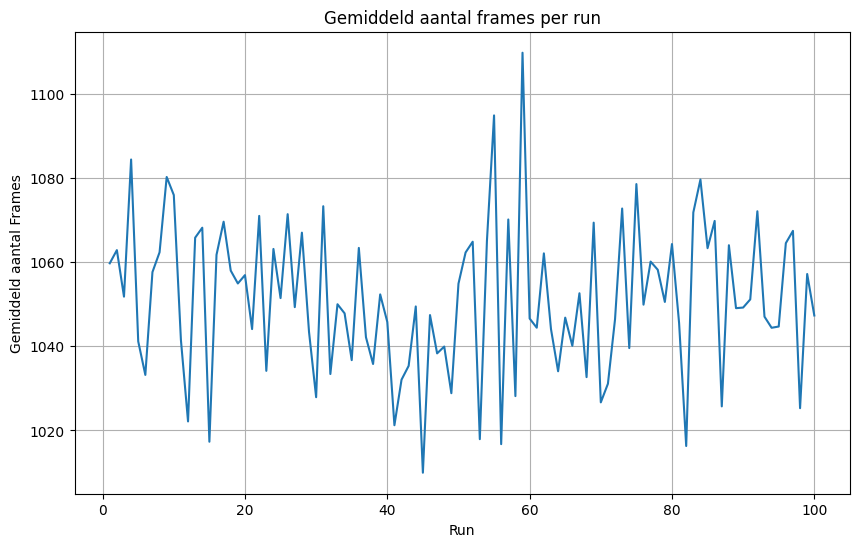

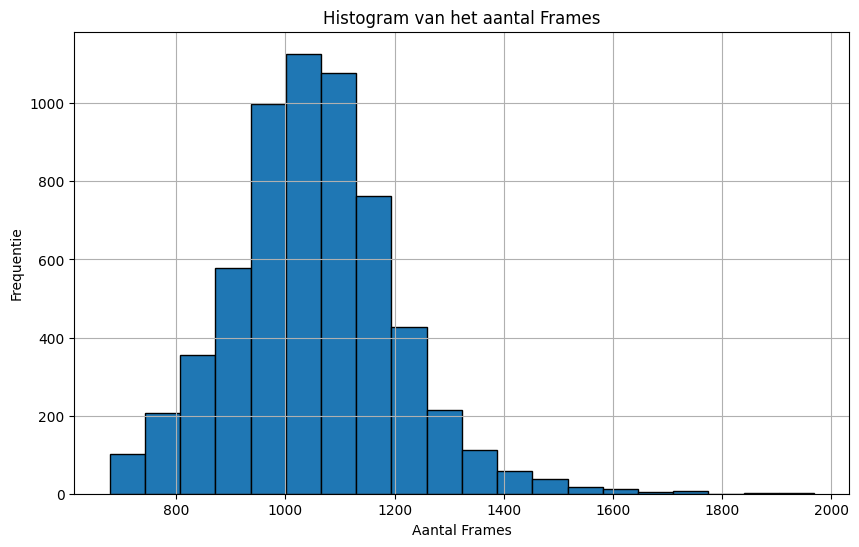

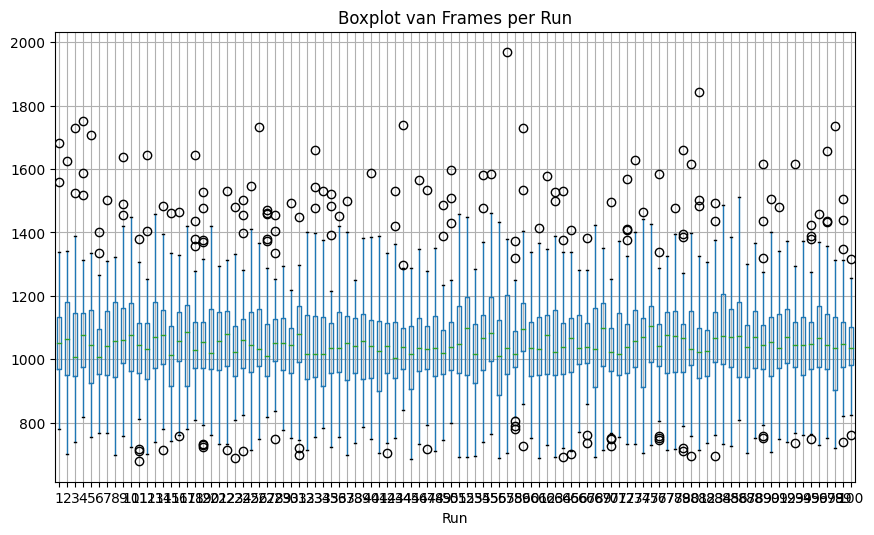

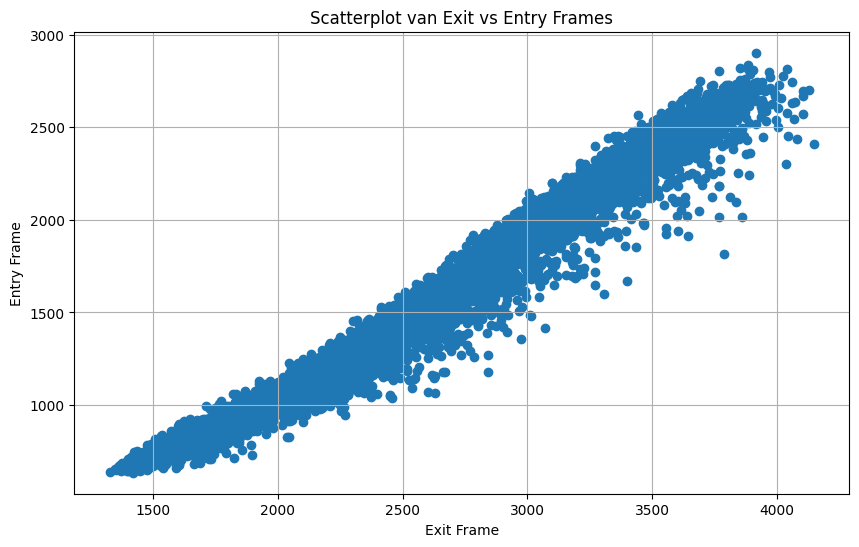

In [20]:
import matplotlib.pyplot as plt

# Maak een plot voor het gemiddeld aantal frames per run
plt.figure(figsize=(10,6))
plt.plot(summary_df['Run'][:-1], summary_df['Mean Frames'][:-1])  # we sluiten het laatste gemiddelde uit
plt.xlabel('Run')
plt.ylabel('Gemiddeld aantal Frames')
plt.title('Gemiddeld aantal frames per run')
plt.grid(True)
plt.show()

# Maak een histogram van de gemiddelde frames
plt.figure(figsize=(10,6))
plt.hist(full_df['Frames'], bins=20, edgecolor='black')
plt.xlabel('Aantal Frames')
plt.ylabel('Frequentie')
plt.title('Histogram van het aantal Frames')
plt.grid(True)
plt.show()

# Boxplot van Frames per Run
full_df.boxplot(column='Frames', by='Run', figsize=(10,6))
plt.title('Boxplot van Frames per Run')
plt.suptitle('')  # Verwijder de automatische 'Boxplot grouped by Run' titel
plt.show()

# Scatterplot van 'exit' en 'entry'
plt.figure(figsize=(10,6))
plt.scatter(full_df['exit'], full_df['entry'])
plt.xlabel('Exit Frame')
plt.ylabel('Entry Frame')
plt.title('Scatterplot van Exit vs Entry Frames')
plt.grid(True)
plt.show()


In [21]:
def z_test(run1, run2):
    data1 = all_data[run1][0]
    data2 = all_data[run2][0]
    avg1 = data1.loc[100]['Mean Frames']
    avg2 = data2.loc[100]['Mean Frames']
    std1 = data1.loc[100]['Std Frames']
    std2 = data2.loc[100]['Std Frames']
    return (avg1 - avg2) / (math.sqrt(std1 ** 2 + std2 ** 2))

keys = list(all_data.keys())
z_test(keys[0], keys[1])

-0.2577266237933793

# $\lambda$Act Analysis


In [123]:
for x in keys:
    print(f'Name is {x} with mean frames of: {all_data[x][0].loc[100]["Mean Frames"]}')

Name is lambda_act_100_setting_1.csv with mean frames of: 1569.9441982310937
Name is lambda_act_100_setting_2.csv with mean frames of: 1635.4987571476431
Name is lambda_act_100_setting_3.csv with mean frames of: 1635.2814830444026
Name is lambda_act_100_setting_4.csv with mean frames of: 1583.9637180551167
Name is lambda_act_200_setting_1.csv with mean frames of: 1241.0281967213114
Name is lambda_act_200_setting_2.csv with mean frames of: 1278.223655737705
Name is lambda_act_200_setting_3.csv with mean frames of: 1285.1547213114757
Name is lambda_act_200_setting_4.csv with mean frames of: 1254.4688524590163
Name is lambda_act_300_setting_1.csv with mean frames of: 1046.1611237440507
Name is lambda_act_300_setting_2.csv with mean frames of: 1054.4572131147543
Name is lambda_act_300_setting_3.csv with mean frames of: 1051.1996721311477
Name is lambda_act_300_setting_4.csv with mean frames of: 1055.4608196721313


In [35]:
from scipy.stats import f_oneway
averages = [all_data[x][0].loc[100]['Mean Frames'] for x in keys]
setting_1 = [averages[x] for x in range(0, len(averages), 4)]
setting_2 = [averages[x] for x in range(1, len(averages)+1, 4)]
setting_3 = [averages[x] for x in range(2, len(averages)+2, 4)]
setting_4 = [averages[x] for x in range(3, len(averages)+3, 4)]
f_score, p = f_oneway(setting_1, setting_2, setting_3, setting_4)
print(f"ANOVA F-score between settings: \nf_score = {f_score}, p={p}")

ANOVA F-score between settings: 
f_score = 0.013592550779932856, p=0.9976515171042021


In [36]:
value_1 = averages[0:4]
value_2 = averages[4:8]
value_3 = averages[8:12]
anova_score, p = f_oneway(value_1, value_2, value_3)
print(anova_score, '{0:.10f}'.format(p))

ANOVA F-score between act-values: 
f_score = 582.642513030576, p=3.020719777271742e-10


# Cell_to_cell adhesion Analysis

In [17]:
c2c_names = ['c2c_adh_0_setting_1.csv',
            'c2c_adh_0_setting_2.csv',
            'c2c_adh_0_setting_3.csv',
            'c2c_adh_0_setting_4.csv',
            'c2c_adh_5_setting_1.csv',
            'c2c_adh_5_setting_2.csv',
            'c2c_adh_5_setting_3.csv',
            'c2c_adh_5_setting_4.csv',
            'c2c_adh_10_setting_1.csv',
            'c2c_adh_10_setting_2.csv',
            'c2c_adh_10_setting_3.csv',
            'c2c_adh_10_setting_4.csv',]

c2c_data = {}
for filename in c2c_names:
    c2c_data[filename] = readfile(filename)

C:\Users\Rob Pennekamp\AppData\Local\Temp\ipykernel_22048\839105759.py:11: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(file, index_col=False)
C:\Users\Rob Pennekamp\AppData\Local\Temp\ipykernel_22048\839105759.py:11: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(file, index_col=False)
C:\Users\Rob Pennekamp\AppData\Local\Temp\ipykernel_22048\839105759.py:11: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(file, index_col=False)
C:\Users\Rob Pennekamp\AppData\Local\Temp\ipykernel_22048\839105759.py:11: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(file, index_col=False)
C:\Users\Rob Pennekamp\AppData\Local\Tem

In [24]:
c2c_keys = list(c2c_data.keys())
for x in c2c_keys:
    print(f'Name is {x} with mean frames of: {c2c_data[x][0].loc[100]["Mean Frames"]}')

Name is c2c_adh_0_setting_1.csv with mean frames of: 1239.5965573770493
Name is c2c_adh_0_setting_2.csv with mean frames of: 1280.8542622950822
Name is c2c_adh_0_setting_3.csv with mean frames of: 1284.6018032786883
Name is c2c_adh_0_setting_4.csv with mean frames of: 1249.9285245901638
Name is c2c_adh_5_setting_1.csv with mean frames of: 1256.8821311475413
Name is c2c_adh_5_setting_2.csv with mean frames of: 1294.8214754098362
Name is c2c_adh_5_setting_3.csv with mean frames of: 1305.2150163934427
Name is c2c_adh_5_setting_4.csv with mean frames of: 1269.2911475409837
Name is c2c_adh_10_setting_1.csv with mean frames of: 1272.6839344262296
Name is c2c_adh_10_setting_2.csv with mean frames of: 1316.6831147540984
Name is c2c_adh_10_setting_3.csv with mean frames of: 1320.296496210118
Name is c2c_adh_10_setting_4.csv with mean frames of: 1286.5237377930546


In [34]:
c2c_avgs = [c2c_data[x][0].loc[100]['Mean Frames'] for x in c2c_keys]
setting_1 = [c2c_avgs[x] for x in range(0, len(c2c_avgs), 4)]
setting_2 = [c2c_avgs[x] for x in range(1, len(c2c_avgs)+1, 4)]
setting_3 = [c2c_avgs[x] for x in range(2, len(c2c_avgs)+2, 4)]
setting_4 = [c2c_avgs[x] for x in range(3, len(c2c_avgs)+3, 4)]
f_score, p = f_oneway(setting_1, setting_2, setting_3, setting_4)
print(f"ANOVA F-score between settings: \nf_score = {f_score}, p={p}")

ANOVA F-score between settings: 
f_score = 4.872778611700735, p=0.03258749265359106


In [33]:
value_1 = c2c_avgs[0:4]
value_2 = c2c_avgs[4:8]
value_3 = c2c_avgs[8:12]
f_score, p = f_oneway(value_1, value_2, value_3)
print(f"ANOVA F-score between act-values: \nf_score = {f_score}, p={p}")

ANOVA F-score between act-values: 
f_score = 2.4323869458169027, p=0.1430486392613676


# Pushing Power analysis

In [39]:
power_files = [
    'scenario_1-dir_50.csv',
    'scenario_2-dir_50.csv',
    'scenario_3-dir_50.csv',
    'scenario_4-dir_50.csv',
    'scenario_1-dir_100.csv',
    'scenario_2-dir_100.csv',
    'scenario_3-dir_100.csv',
    'scenario_4-dir_100.csv',
    'scenario_1-dir_200.csv',
    'scenario_2-dir_200.csv',
    'scenario_3-dir_200.csv',
    'scenario_4-dir_200.csv'
]
power_data = {}
for x in power_files:
    power_data[x] = readfile(x)

C:\Users\Rob Pennekamp\AppData\Local\Temp\ipykernel_22048\839105759.py:11: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(file, index_col=False)
C:\Users\Rob Pennekamp\AppData\Local\Temp\ipykernel_22048\839105759.py:11: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(file, index_col=False)
C:\Users\Rob Pennekamp\AppData\Local\Temp\ipykernel_22048\839105759.py:11: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(file, index_col=False)
C:\Users\Rob Pennekamp\AppData\Local\Temp\ipykernel_22048\839105759.py:11: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(file, index_col=False)
C:\Users\Rob Pennekamp\AppData\Local\Tem

In [40]:
power_keys = list(power_data.keys())
for x in power_keys:
    print(f'Name is {x} with mean frames of: {power_data[x][0].loc[100]["Mean Frames"]}')

Name is scenario_1-dir_50.csv with mean frames of: 2323.5615835880335
Name is scenario_2-dir_50.csv with mean frames of: 2415.328790644272
Name is scenario_3-dir_50.csv with mean frames of: 2403.292940566101
Name is scenario_4-dir_50.csv with mean frames of: 2345.999984393813
Name is scenario_1-dir_100.csv with mean frames of: 1239.5965573770493
Name is scenario_2-dir_100.csv with mean frames of: 1278.223655737705
Name is scenario_3-dir_100.csv with mean frames of: 1286.92
Name is scenario_4-dir_100.csv with mean frames of: 1255.424426229508
Name is scenario_1-dir_200.csv with mean frames of: 975.7345901639343
Name is scenario_2-dir_200.csv with mean frames of: 1006.697704918033
Name is scenario_3-dir_200.csv with mean frames of: 1002.7018032786887
Name is scenario_4-dir_200.csv with mean frames of: 978.0706557377048


In [38]:
power_avgs = [power_data[x][0].loc[100]['Mean Frames'] for x in power_keys]
setting_1 = [power_avgs[x] for x in range(0, len(power_avgs), 4)]
setting_2 = [power_avgs[x] for x in range(1, len(power_avgs)+1, 4)]
setting_3 = [power_avgs[x] for x in range(2, len(power_avgs)+2, 4)]
setting_4 = [power_avgs[x] for x in range(3, len(power_avgs)+3, 4)]
f_score, p = f_oneway(setting_1, setting_2, setting_3, setting_4)
print(f"ANOVA F-score between settings: \nf_score = {f_score}, p={p}")

ANOVA F-score between settings: 
f_score = 0.003869895854109767, p=0.9996389333935836


In [41]:
value_1 = power_avgs[0:4]
value_2 = power_avgs[4:8]
value_3 = power_avgs[8:12]
f_score, p = f_oneway(value_1, value_2, value_3)
print(f"ANOVA F-score between act-values: \nf_score = {f_score}, p={p}")

ANOVA F-score between act-values: 
f_score = 2492.9713893536596, p=4.474082255268969e-13


# Standard Analysis

In [43]:
names = [
    'scenario_1-setting_1.csv',
    'scenario_2-setting_1.csv',
    'scenario_3-setting_1.csv',
    'scenario_4-setting_1.csv',
    'scenario_1-setting_2.csv',
    'scenario_2-setting_2.csv',
    'scenario_3-setting_2.csv',
    'scenario_4-setting_2.csv',
    'scenario_1-setting_3.csv',
    'scenario_2-setting_3.csv',
    'scenario_3-setting_3.csv',
    'scenario_4-setting_3.csv'
]

standard_data = {}

for x in names:
    standard_data[x] = readfile(x)

C:\Users\Rob Pennekamp\AppData\Local\Temp\ipykernel_22048\839105759.py:11: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(file, index_col=False)
C:\Users\Rob Pennekamp\AppData\Local\Temp\ipykernel_22048\839105759.py:11: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(file, index_col=False)
C:\Users\Rob Pennekamp\AppData\Local\Temp\ipykernel_22048\839105759.py:11: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(file, index_col=False)
C:\Users\Rob Pennekamp\AppData\Local\Temp\ipykernel_22048\839105759.py:11: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(file, index_col=False)
C:\Users\Rob Pennekamp\AppData\Local\Tem

In [44]:
standard_keys = list(standard_data.keys())
for x in standard_keys:
    print(f'Name is {x} with mean frames of: {standard_data[x][0].loc[100]["Mean Frames"]}')

Name is scenario_1-setting_1.csv with mean frames of: 1239.5965573770493
Name is scenario_2-setting_1.csv with mean frames of: 1278.223655737705
Name is scenario_3-setting_1.csv with mean frames of: 1286.522344262295
Name is scenario_4-setting_1.csv with mean frames of: 1255.424426229508
Name is scenario_1-setting_2.csv with mean frames of: 1270.6616393442623
Name is scenario_2-setting_2.csv with mean frames of: 1638.9527712264526
Name is scenario_3-setting_2.csv with mean frames of: 1371.8238866479514
Name is scenario_4-setting_2.csv with mean frames of: 1248.1168852459016
Name is scenario_1-setting_3.csv with mean frames of: 1429.4323476428638
Name is scenario_2-setting_3.csv with mean frames of: 1057.9544262295083
Name is scenario_3-setting_3.csv with mean frames of: 1174.4459016393444
Name is scenario_4-setting_3.csv with mean frames of: 1250.0901639344263
